In [1]:
#Importing library and data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
country_data = pd.read_csv("C:\\Users\\thato\\Downloads\\GlobalLandTemperaturesByCity.csv.zip")
greece = country_data[country_data["Country"] == "Greece"].copy()
greece["dt"] = pd.to_datetime(greece['dt'])

In [7]:
globe = pd.read_csv("C:\\Users\\thato\\Downloads\\GlobalLandTemperaturesByCity.csv.zip")
globe["dt"] = pd.to_datetime(globe["dt"])
co2_ppm = pd.read_csv("C:\\Users\\thato\\Downloads\\archive.csv")

In [15]:
#The calculation of the mean temperature of 1951 - 1980 period to establish the global base mean temperature
annual_mean_global = globe.groupby(globe["dt"].dt.year).mean()
reference_temperature_global = annual_mean_global.loc[1951:1980].mean()["AverageTemperature"]
annual_mean_global["Anomaly"] = annual_mean_global["AverageTemperature"] - reference_temperature_global

In [17]:
annual_mean_greece = greece.groupby(greece["dt"].dt.year).mean()
reference_temperature_greece = annual_mean_greece.loc[1951:1980].mean()["AverageTemperature"]
annual_mean_greece["Anomaly"] = annual_mean_greece["AverageTemperature"] - reference_temperature_greece

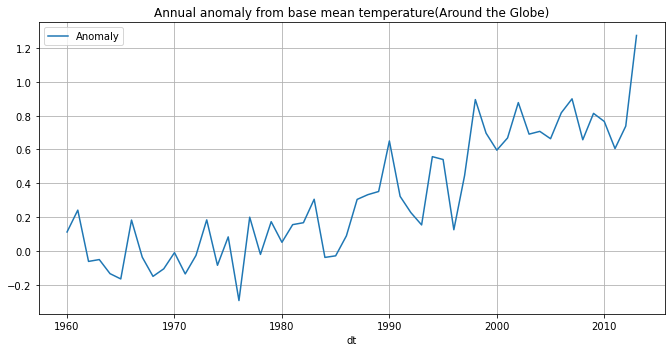

In [23]:
#plot the graph
plt.figure()
plt.style.use("default")
annual_mean_global.loc[1960:2015]["Anomaly"].plot(figsize= (10, 5), grid = True, legend=True)
plt.title("Annual anomaly from base mean temperature(Around the globe)")
plt.xlabel
plt.ylabel
plt.show()

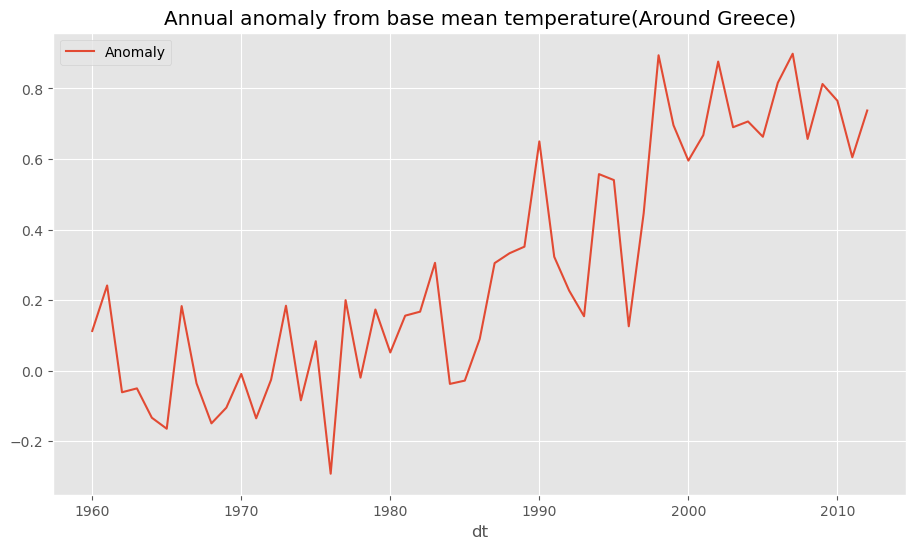

In [25]:
plt.figure()
plt.style.use("ggplot")
annual_mean_global.loc[1960:2012]["Anomaly"].plot(figsize = (11, 6), grid = True, legend = True)
plt.title("Annual anomaly from base mean temperature(Around Greece)")
plt.xlabel
plt.ylabel
plt.show()

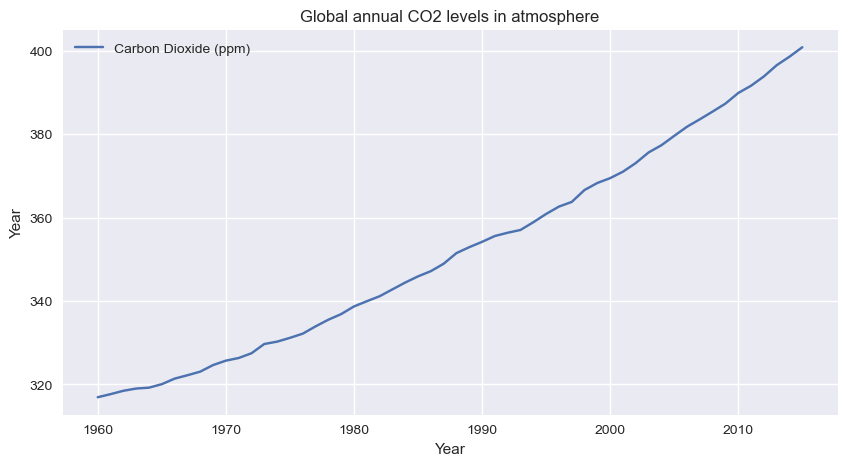

In [29]:
plt.figure()
plt.style.use("seaborn")
annual_co2_ppm = co2_ppm.groupby(co2_ppm["Year"]).mean()
annual_co2_ppm.loc[1960:2015]["Carbon Dioxide (ppm)"].plot(figsize = (10,5), grid= True, legend = True)
plt.title("Global annual CO2 levels in atmosphere")
plt.ylabel("CO2 parts per million")
plt.ylabel("Year")
plt.show()

In [33]:
#Results of Average Temperature, Anomaly, Carbon Dioxide(ppm)
annual_co2_temp = pd.merge(annual_mean_global.loc[1960:2015], annual_co2_ppm.loc[1960:2015], left_index = True, right_index = True)
annual_co2_temp = annual_co2_temp[["AverageTemperature", "Anomaly", "Carbon Dioxide (ppm)"]].copy()
annual_co2_temp.corr()

,AverageTemperature,Anomaly,Carbon Dioxide (ppm)
AverageTemperature,1.000000,1.000000,0.882935
Anomaly,1.000000,1.000000,0.882935
Carbon Dioxide (ppm),0.882935,0.882935,1.000000


<AxesSubplot:xlabel='Anomaly', ylabel='Carbon Dioxide (ppm)'>

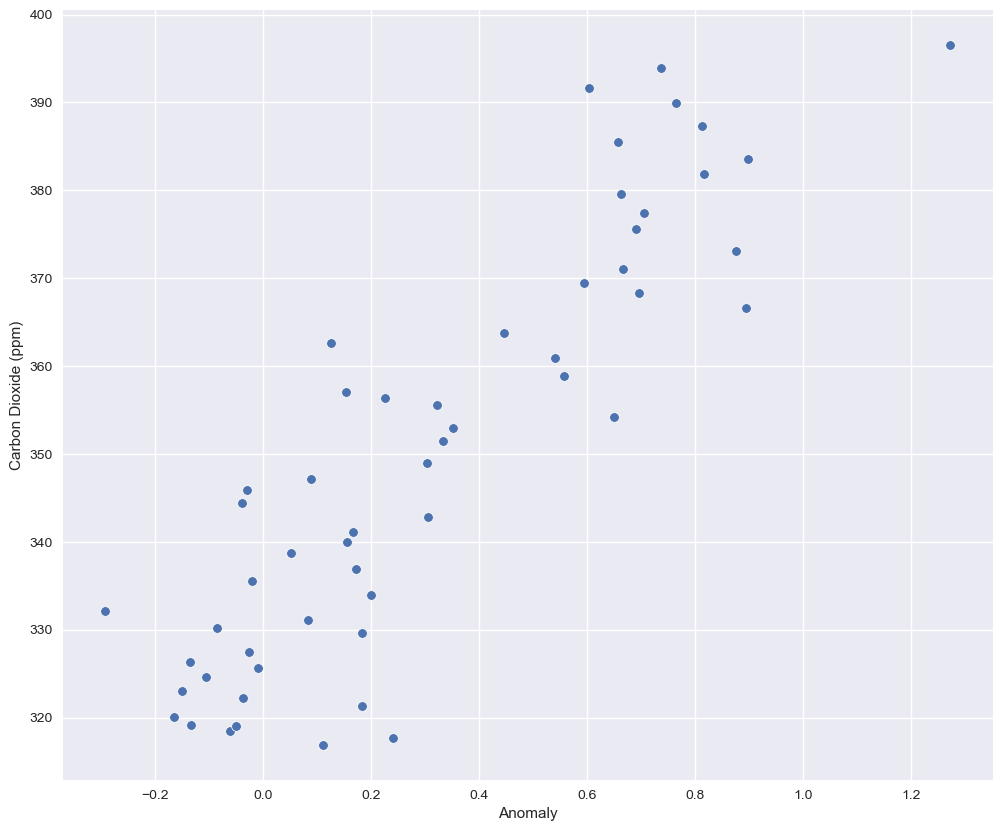

In [35]:
#Sketch a scatterplot( which visualizes the linear relation between CO2 levels and temperature anomaly)
plt.figure(figsize = (12, 10))
sns.scatterplot(x="Anomaly", y="Carbon Dioxide (ppm)", data= annual_co2_temp)